<a href="https://colab.research.google.com/github/alberto2020china/fake_jobs/blob/main/Fake_jobs_detection_dev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd #
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import string
import numpy as np
import pandas as pd
import random
import missingno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = ('/content/drive/My Drive/Omdena/FakeJobs/fake_postings.csv')
df_raw = pd.read_csv(file_path)

In [ ]:
df_raw.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
print(df_raw.columns)
df_raw.describe()

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del df_raw[col]


In [ ]:
df_raw.fillna(' ', inplace=True)

In [ ]:
df_raw.head(2)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,"Marketing Intern US, NY, New York We're Food52..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."


In [ ]:
df_raw['text'] = df_raw['title'] + ' ' + df_raw['location'] + ' ' + df_raw['company_profile'] + ' ' + df_raw['description'] + ' ' + df_raw['requirements'] + ' ' + df_raw['benefits']

# List of columns to delete
columns_to_delete = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'required_experience', 'required_education', 'industry', 'function', ]

# Delete specified columns
df_raw.drop(columns=columns_to_delete, inplace=True)



In [ ]:
df_raw.head(2)

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."


In [ ]:
fraudjobs_text = df_raw[df_raw.fraudulent==1].text
actualjobs_text = df_raw[df_raw.fraudulent==0].text

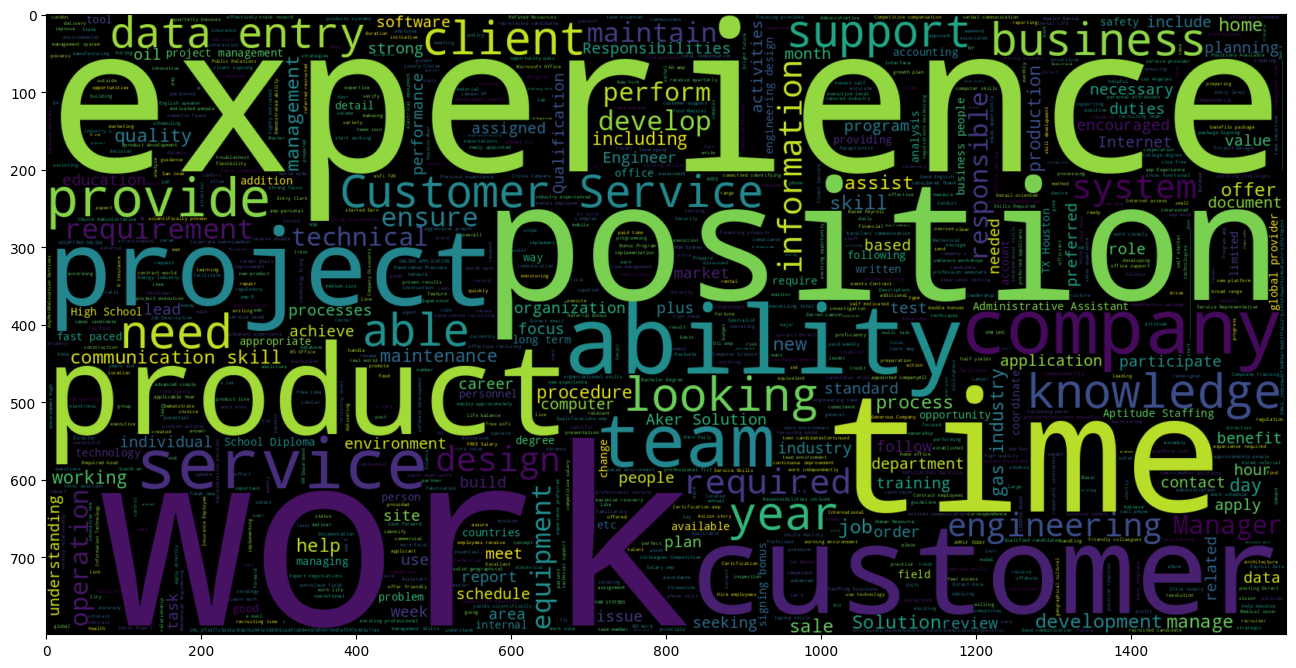

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
# Word Cloud for fake jobs

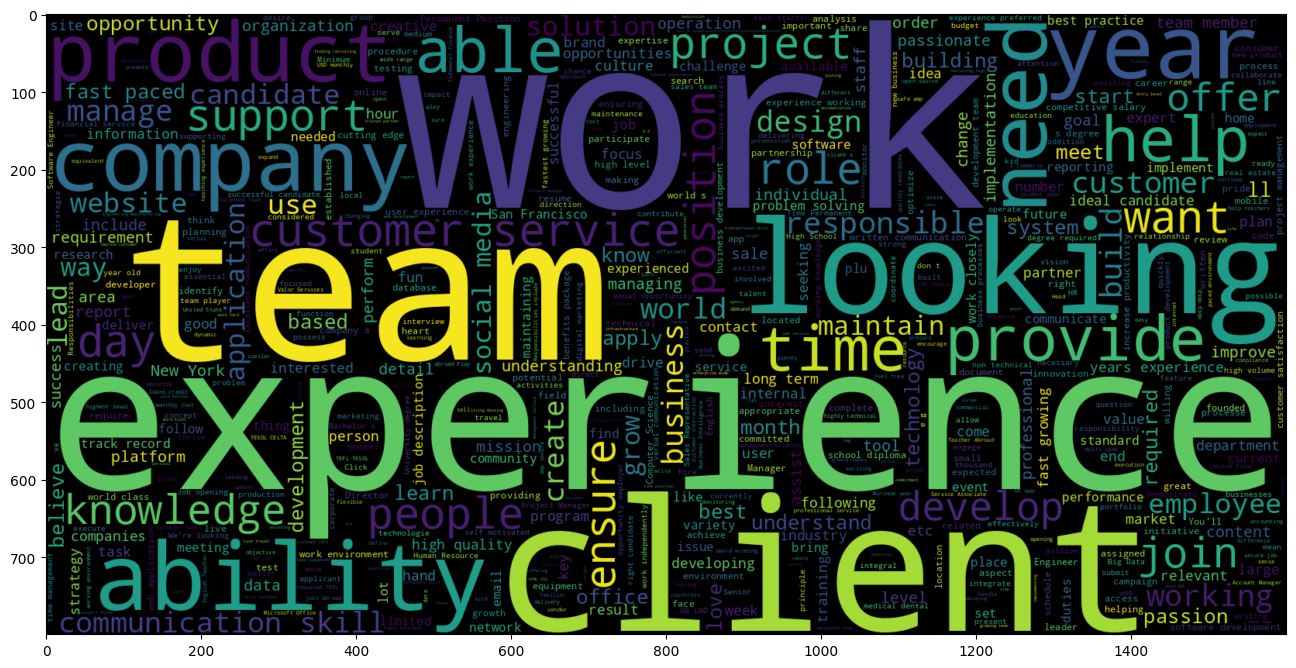

In [ ]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
# Word Cloud for real jobs

In [ ]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # Extract tokens and create a list
    mytokens = [token.text for token in mytokens]



    # Removing stop words and punctuation
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]


    # Filter out empty strings
    mytokens = list(filter(None, mytokens))


    # Return preprocessed list of tokens
    return mytokens

In [ ]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_raw.text, df_raw.fraudulent, test_size=0.3)

In [ ]:
len(X_test)

5364

In [ ]:
def models(x):
    if x == 'LogisticRegression':
        clf = LogisticRegression()

    elif x == 'RandomForest':
        clf = RandomForestClassifier()

    elif x == 'SVC':
        clf = SVC()

    elif x == 'XGBoost':
        clf = XGBClassifier()

    else:
        raise ValueError("Invalid input for classifier. Choose from 'LogisticRegression', 'RandomForest', 'SVC', or 'XGBoost'.")

    # Create pipeline using Bag of Words
    pipe = Pipeline([("cleaner", predictors()),
                    ('vectorizer', bow_vector),
                    ('classifier', clf)])

    # Fitting model
    pipe.fit(X_train, y_train)

    # Predicting with a test dataset
    predicted = pipe.predict(X_test)


    # Model Accuracy
    print(x, "Accuracy: ", accuracy_score(y_test, predicted))
    print(x, "Recall: ", recall_score(y_test, predicted))
    print(x, "F1-score: ", f1_score(y_test, predicted))
    cm = confusion_matrix(y_test, predicted)

    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])  # Replace [0, 1] with your class labels
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()


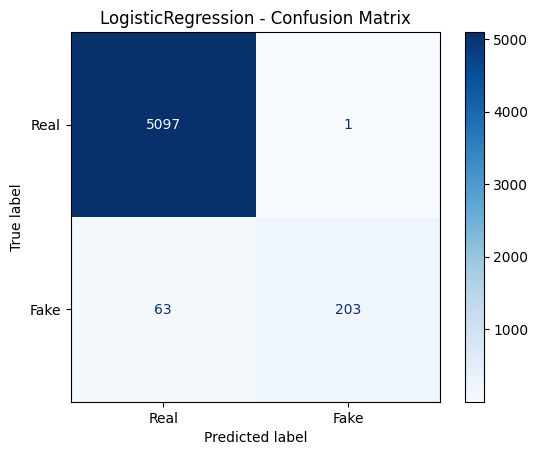

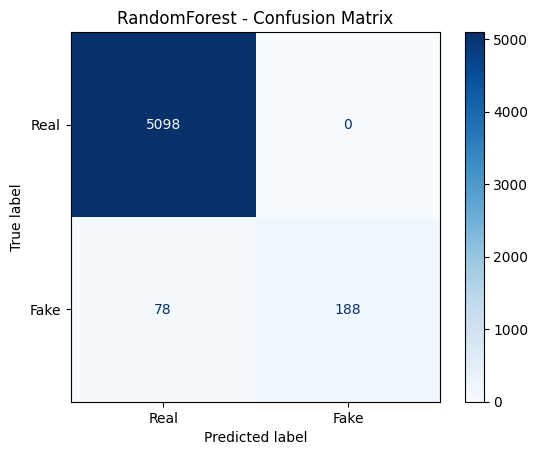

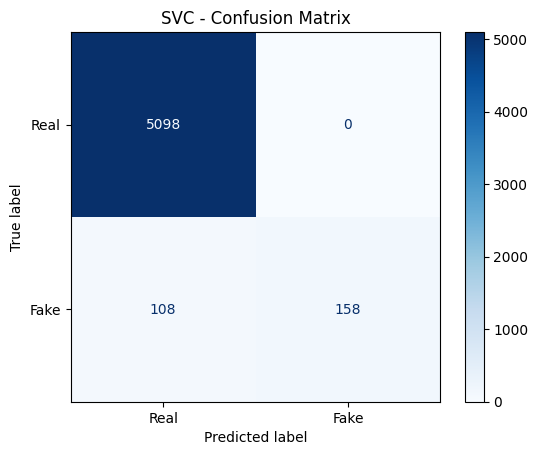

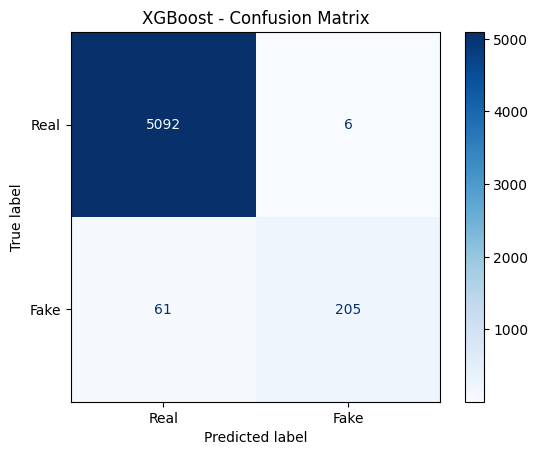

LogisticRegression - Accuracy: 0.99, Recall: 0.76, F1-score: 0.86
RandomForest - Accuracy: 0.99, Recall: 0.71, F1-score: 0.83
SVC - Accuracy: 0.98, Recall: 0.59, F1-score: 0.75
XGBoost - Accuracy: 0.99, Recall: 0.77, F1-score: 0.86


In [ ]:
def run_classifier(clf_name, X_train, y_train, X_test, y_test):
    try:
        if clf_name == 'LogisticRegression':
            clf = LogisticRegression()
        elif clf_name == 'RandomForest':
            clf = RandomForestClassifier()
        elif clf_name == 'SVC':
            clf = SVC()
        elif clf_name == 'XGBoost':
            clf = XGBClassifier()
        else:
            raise ValueError("Invalid input for classifier. Choose from 'LogisticRegression', 'RandomForest', 'SVC', or 'XGBoost'.")

        # Create pipeline using Bag of Words
        pipe = Pipeline([("cleaner", predictors()),
                        ('vectorizer', bow_vector),
                        ('classifier', clf)])

        # Fitting model
        pipe.fit(X_train, y_train)

        # Predicting with a test dataset
        predicted = pipe.predict(X_test)

        # Model Metrics
        accuracy = accuracy_score(y_test, predicted)
        recall = recall_score(y_test, predicted)
        f1 = f1_score(y_test, predicted)
        cm = confusion_matrix(y_test, predicted)

        # Display the confusion matrix using ConfusionMatrixDisplay
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'{clf_name} - Confusion Matrix')
        plt.show()

        return {
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Recall': recall,
            'F1-score': f1
        }

    except Exception as e:
        return {
            'Classifier': clf_name,
            'Error': str(e)
        }

# List of classifiers
classifiers = ['LogisticRegression', 'RandomForest', 'SVC', 'XGBoost']

# Results dictionary
results = []

# Run each classifier and store results
for clf in classifiers:
    result = run_classifier(clf, X_train, y_train, X_test, y_test)
    results.append(result)

# Display results
for result in results:
    if 'Error' in result:
        print(f"{result['Classifier']} encountered an error: {result['Error']}")
    else:
        print(f"{result['Classifier']} - Accuracy: {result['Accuracy']:.2f}, Recall: {result['Recall']:.2f}, F1-score: {result['F1-score']:.2f}")
